In [50]:
from config import *

import pandas as pd
import numpy as np
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

import re
import random

# À la découverte des données d'intermarché

In [3]:
df_nomenclature = pd.read_csv(join(DATA_DIR, 'nomenclature_produits.csv'))
df_pdv = pd.read_csv(join(DATA_DIR, 'points_de_vente.csv'))
df_pv = pd.read_csv(join(DATA_DIR, 'prix_vente.csv'))
df_v = pd.read_csv(join(DATA_DIR, 'ventes_2018.csv'))

# Nomenclature

In [4]:
df_nomenclature.columns

Index(['ID_ARTC', 'LB_VENT_RAYN', 'LB_VENT_FAML', 'LB_VENT_SOUS_FAML'], dtype='object')

In [6]:
df_nomenclature.dtypes

ID_ARTC               int64
LB_VENT_RAYN         object
LB_VENT_FAML         object
LB_VENT_SOUS_FAML    object
dtype: object

In [7]:
df_nomenclature

,ID_ARTC,LB_VENT_RAYN,LB_VENT_FAML,LB_VENT_SOUS_FAML
0,905,CREMERIE LS,ULTRA FRAIS,ULTRA FRAIS - SS-FAML 2
1,477,LIQUIDES,BOISSONS GAZEUSES ET PLATES,BOISSONS GAZEUSES ET PLATES - SS-FAML 6
2,863,LIQUIDES,BIERES ET CIDRES,BIERES ET CIDRES - SS-FAML 2
3,1741,EPICERIE SUCREE,CAFES / CHICOREE,CAFES / CHICOREE - SS-FAML 2
4,983,CREMERIE LS,FROMAGE LS,FROMAGE LS - SS-FAML 2
...,...,...,...,...
2495,370,BAZAR LEGER,ACCESSOIRE / GADGET DE CUISINE,ACCESSOIRE / GADGET DE CUISINE
2496,308,CREMERIE LS,FROMAGE LS,FROMAGE LS - SS-FAML 1
2497,2467,D.P.H.,ACCESSOIRES COIFFANT/TOILETTE,ACCESSOIRES COIFFANT/TOILETTE
2498,540,CHARCUTERIE TRAITEUR LS,TRAITEUR LS,TRAITEUR LS - SS-FAML 7


In [48]:
df_nomenclature['LB_VENT_RAYN'].value_counts()

EPICERIE SUCREE              400
CREMERIE LS                  376
EPICERIE SALEE               368
LIQUIDES                     340
D.P.H.                       322
CHARCUTERIE TRAITEUR LS      213
BAZAR LEGER                  150
SURGELES                     102
PAIN PAT LS INDUS             69
ALIMENTATION POUR ANIMAUX     57
FRUITS ET LEGUMES             46
BOUCHERIE LS                  23
SAURISSERIE                   18
VOLAILLE LS                   16
Name: LB_VENT_RAYN, dtype: int64

In [47]:
df_nomenclature['LB_VENT_FAML'].value_counts()

ULTRA FRAIS                    130
FROMAGE LS                     113
TRAITEUR LS                    102
CHARCUTERIE LS ET SALAISON      98
BOISSONS GAZEUSES ET PLATES     70
                              ... 
BOUGIE ENCENS BRIQUETS           1
SPORTS/EQUIPEMENTS SPORTIF       1
SECHANT / REPASSANT              1
CONDITIONNEMENTS CADEAUX         1
CARBURANTS ET COMBUSTIBLES       1
Name: LB_VENT_FAML, Length: 135, dtype: int64

In [49]:
df_nomenclature['LB_VENT_SOUS_FAML'].value_counts()

ULTRA FRAIS - SS-FAML 1                    56
FROMAGE LS - SS-FAML 1                     51
ULTRA FRAIS - SS-FAML 2                    50
BEURRE LS                                  36
F/L RAYON REFRIGERE                        30
                                           ..
VAISSELLE-VERRERIE-COUVERTS - SS-FAML 3     1
PAPIERS - SS-FAML 5                         1
BISCUITERIE - SS-FAML 5                     1
VAISSELLE A JETER - SS-FAML 5               1
PILES - SS-FAML 2                           1
Name: LB_VENT_SOUS_FAML, Length: 466, dtype: int64

# Points de ventes

In [8]:
df_pdv.columns

Index(['ID_PDV', 'ID_VOCT', 'ID_REGN', 'NB_CAIS_GRP', 'SURF_GRP'], dtype='object')

In [9]:
df_pdv.dtypes

ID_PDV          int64
ID_VOCT        object
ID_REGN        object
NB_CAIS_GRP    object
SURF_GRP       object
dtype: object

In [10]:
df_pdv['ID_REGN'].unique()

array(['RGN_1', 'RGN_4', 'RGN_7', 'RGN_8', 'RGN_2', 'RGN_3', 'RGN_5',
       'RGN_6'], dtype=object)

In [11]:
df_pdv['NB_CAIS_GRP'].unique()

array(['NB_CAIS_G_1', 'NB_CAIS_G_4', 'NB_CAIS_G_2', 'NB_CAIS_G_3',
       'NB_CAIS_G_5'], dtype=object)

In [12]:
df_pdv['SURF_GRP'].unique()

array(['SURF_G_1', 'SURF_G_2', 'SURF_G_3', 'SURF_G_4', 'SURF_G_5'],
      dtype=object)

In [100]:
len(df_pdv)

149

# Prix de ventes

In [14]:
df_pv.columns

Index(['ID_PDV', 'ID_ARTC', 'ANNEE', 'TRIMESTRE', 'PRIX_UNITAIRE'], dtype='object')

In [18]:
df_pv['PRIX_UNITAIRE'].unique()

array(['Entre 3 et 3.99€', 'Entre 2 et 2.99€', 'Moins de 0.99€',
       'Entre 1 et 1.99€', 'Entre 6 et 6.99€', 'Entre 4 et 4.99€',
       'Entre 5 et 5.99€', 'Entre 12 et 13.99€', 'Entre 9 et 9.99€',
       'Entre 10 et 11.99€', 'Entre 7 et 7.99€', 'Entre 18 et 19.99€',
       'Entre 30 et 39.99€', 'Entre 14 et 15.99€', 'Entre 16 et 17.99€',
       'Entre 8 et 8.99€', 'Entre 20 et 29.99€', 'Entre 40 et 49.99€'],
      dtype=object)

# Ventes 2018

In [19]:
df_v.columns

Index(['ID_PDV', 'ID_ARTC', 'DATE', 'QTE'], dtype='object')

In [22]:
df_v.dtypes

ID_PDV              int64
ID_ARTC             int64
DATE       datetime64[ns]
QTE                 int64
dtype: object

In [21]:
df_v['DATE'] = pd.to_datetime(df_v['DATE'])

In [23]:
len(df_v)

32793018

# Idées de traitement

1. Corrélation entre NB_CAIS_GRP et SURF_GRP
2. Est-ce qu'un même article se vend à la même tranche de prix dans tous les centres
3. La distribution des articles par centre (vendent-ils tous les mêmes articles ?)
4. Est ce que les prix d'un même article sont plus élevés quand la surface est plus petite ?
5. Afficher les volumes pour un produit (séléctionné arbitrairement/aléatoirement)
6. Corrélation entre la quantité vendue et sa tranche de prix ?
7. Lien entre vocation (type de centre) et NB_CAIS_GRP/SURF_GRP

## 1. NB_CAIS_GRP et SURF_GRP

In [104]:
ordinal = re.compile(r'\d')

# Création variable ordinale
nb_cais_grp = df_pdv['NB_CAIS_GRP'].apply(lambda x: ordinal.search(x)[0]).astype(np.int64)
surf_grp = df_pdv['SURF_GRP'].apply(lambda x: ordinal.search(x)[0]).astype(np.int64)

df_pdv['CAISSE_ORDINAL'] = nb_cais_grp
df_pdv['SURFACE_ORDINAL'] = surf_grp

In [36]:
f"{(nb_cais_grp == surf_grp).sum() / len(nb_cais_grp) * 100 :.2f} %"

'47.65 %'

In [40]:
coef, _ = pearsonr(nb_cais_grp, surf_grp)
coef

0.8018498552364448

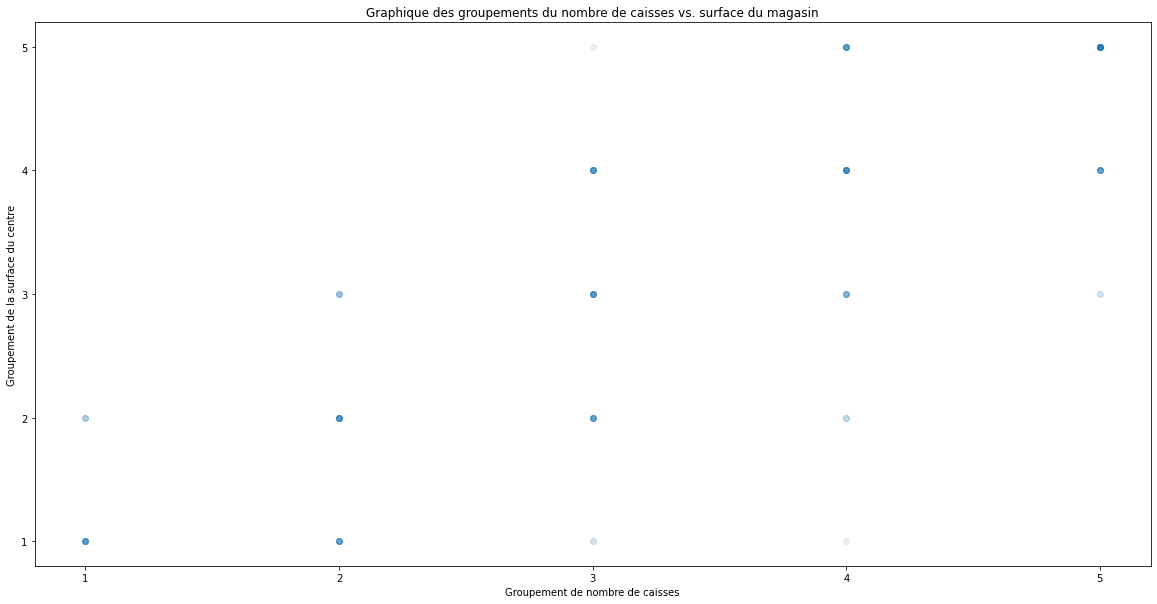

In [46]:
plt.figure(figsize=(20, 10))

plt.scatter(nb_cais_grp, surf_grp, alpha=0.1)
plt.title('Graphique des groupements du nombre de caisses vs. surface du magasin')
plt.xlabel('Groupement de nombre de caisses')
plt.ylabel('Groupement de la surface du centre')

plt.xticks([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])

plt.show()

## 2. et 3. Même article = même prix partout ?

In [89]:
def get_different_price(id_artc):
    l = []
    _ = df_pv[(df_pv['ID_ARTC'] == id_artc) & (df_pv['ANNEE'] == 2018)].groupby('ID_PDV')['PRIX_ORDINAL'].unique().apply(lambda x: l.extend(x))
    return set(l)

In [99]:
ids = random.sample(df_pv['ID_ARTC'].unique().tolist(), k=10)

dict_assoc = {
    'Moins de 0.99€': 1,
    'Entre 1 et 1.99€': 2,
    'Entre 2 et 2.99€': 3,
    'Entre 3 et 3.99€': 4,
    'Entre 4 et 4.99€': 5,
    'Entre 5 et 5.99€': 6,
    'Entre 6 et 6.99€': 7,
    'Entre 7 et 7.99€': 8,
    'Entre 8 et 8.99€': 9,
    'Entre 9 et 9.99€': 10,
    'Entre 10 et 11.99€': 11,
    'Entre 12 et 13.99€': 12,
    'Entre 14 et 15.99€': 13,
    'Entre 16 et 17.99€': 14,
    'Entre 18 et 19.99€': 15,
    'Entre 20 et 29.99€': 16,
    'Entre 30 et 39.99€': 17,
    'Entre 40 et 49.99€': 18
}

df_pv['PRIX_ORDINAL'] = df_pv['PRIX_UNITAIRE'].apply(lambda x: dict_assoc[x]).astype(np.int64)

for i in ids:
    nb_pdvs = len(df_pv[df_pv['ID_ARTC'] == i]['ID_PDV'].unique())
    print(f"Article : {i} | Prix différents : {get_different_price(i)} | Combien de points de ventes le vendent : {nb_pdvs}")

Article : 1568 | Prix différents : {2} | Combien de points de ventes le vendent : 131
Article : 155 | Prix différents : {4, 5} | Combien de points de ventes le vendent : 149
Article : 355 | Prix différents : {2, 3} | Combien de points de ventes le vendent : 48
Article : 1528 | Prix différents : {3, 4} | Combien de points de ventes le vendent : 135
Article : 528 | Prix différents : {1, 2} | Combien de points de ventes le vendent : 144
Article : 1058 | Prix différents : {2, 3} | Combien de points de ventes le vendent : 32
Article : 89 | Prix différents : {2} | Combien de points de ventes le vendent : 149
Article : 2360 | Prix différents : {6, 7} | Combien de points de ventes le vendent : 44
Article : 1606 | Prix différents : {2, 3} | Combien de points de ventes le vendent : 141
Article : 109 | Prix différents : {1, 2} | Combien de points de ventes le vendent : 145


# 4. Lien entre la surface et le prix ?

In [102]:
df_pdv['ID_PDV']
df_pv['ID_PDV']

0          44
1          44
2          44
3          44
4          44
           ..
1185310     8
1185311     8
1185312     8
1185313     8
1185314     8
Name: ID_PDV, Length: 1185315, dtype: int64

In [106]:
df_sp = df_pv.merge(df_pdv, left_on='ID_PDV', right_on='ID_PDV')

In [111]:
df_sp.columns

Index(['ID_PDV', 'ID_ARTC', 'ANNEE', 'TRIMESTRE', 'PRIX_UNITAIRE',
       'PRIX_ORDINAL', 'ID_VOCT', 'ID_REGN', 'NB_CAIS_GRP', 'SURF_GRP',
       'CAISSE_ORDINAL', 'SURFACE_ORDINAL'],
      dtype='object')

In [114]:
df_sp[(df_sp['ANNEE'] == 2018) & (df_sp['TRIMESTRE'] == 1) & (df_sp['ID_ARTC'] == 543)]

,ID_PDV,ID_ARTC,ANNEE,TRIMESTRE,PRIX_UNITAIRE,PRIX_ORDINAL,ID_VOCT,ID_REGN,NB_CAIS_GRP,SURF_GRP,CAISSE_ORDINAL,SURFACE_ORDINAL
4,44,543,2018,1,Entre 1 et 1.99€,2,VOC_4,RGN_1,NB_CAIS_G_5,SURF_G_4,5,4
17585,39,543,2018,1,Entre 1 et 1.99€,2,VOC_3,RGN_7,NB_CAIS_G_5,SURF_G_5,5,5
28169,34,543,2018,1,Entre 1 et 1.99€,2,VOC_3,RGN_1,NB_CAIS_G_5,SURF_G_5,5,5
29470,127,543,2018,1,Entre 1 et 1.99€,2,VOC_5,RGN_3,NB_CAIS_G_5,SURF_G_5,5,5
47003,142,543,2018,1,Entre 1 et 1.99€,2,VOC_5,RGN_6,NB_CAIS_G_5,SURF_G_5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1151388,77,543,2018,1,Entre 1 et 1.99€,2,VOC_4,RGN_4,NB_CAIS_G_2,SURF_G_2,2,2
1156693,16,543,2018,1,Entre 1 et 1.99€,2,VOC_1,RGN_5,NB_CAIS_G_2,SURF_G_2,2,2
1163478,2,543,2018,1,Entre 1 et 1.99€,2,VOC_1,RGN_2,NB_CAIS_G_1,SURF_G_1,1,1
1168965,23,543,2018,1,Entre 1 et 1.99€,2,VOC_1,RGN_8,NB_CAIS_G_2,SURF_G_1,2,1
